# Regression Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

* импорт файла, а записи из этого файлы помещены в соответствующие переменные. 

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

* произведено предварительное шкалирование данные

In [4]:
#!pip install tensorflow
#!pip install keras

In [5]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [6]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(20, activation = 'tanh', input_dim = 19))

# Adding the second hidden layer
rnn.add(Dense(10, activation = 'tanh'))

# Adding the third hidden layer
rnn.add(Dense(5, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Создана нейронная сеть. Добавлены слои. На вход поступает вектор размерностью 19. Целесообразно на слоях сети брать функцию, которая изменяется в том же диапозоне, что и данные - тангенс, а на выходе линейную. Такое сочетание функций дает наилучший результат.

In [7]:
# Fitting the ANN to the Training set
k = rnn.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
672/672 [==============================] - 1s 1ms/step - loss: 0.7201 - accuracy: 0.0000e+00 - val_loss: 0.6390 - val_accuracy: 0.0000e+00
Epoch 2/100
672/672 [==============================] - 1s 1ms/step - loss: 0.6394 - accuracy: 0.0000e+00 - val_loss: 0.6297 - val_accuracy: 0.0000e+00
Epoch 3/100
672/672 [==============================] - 1s 1ms/step - loss: 0.6245 - accuracy: 0.0000e+00 - val_loss: 0.6217 - val_accuracy: 0.0000e+00
Epoch 4/100
672/672 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.0000e+00 - val_loss: 0.6026 - val_accuracy: 0.0000e+00
Epoch 5/100
672/672 [==============================] - 1s 1ms/step - loss: 0.5832 - accuracy: 0.0000e+00 - val_loss: 0.5769 - val_accuracy: 0.0000e+00
Epoch 6/100
672/672 [==============================] - 1s 1ms/step - loss: 0.5662 - accuracy: 0.0000e+00 - val_loss: 0.5615 - val_accuracy: 0.0000e+00
Epoch 7/100
672/672 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 

Epoch 55/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4249 - accuracy: 0.0000e+00 - val_loss: 0.5490 - val_accuracy: 0.0000e+00
Epoch 56/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4243 - accuracy: 0.0000e+00 - val_loss: 0.5483 - val_accuracy: 0.0000e+00
Epoch 57/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4197 - accuracy: 0.0000e+00 - val_loss: 0.5463 - val_accuracy: 0.0000e+00
Epoch 58/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4211 - accuracy: 0.0000e+00 - val_loss: 0.5475 - val_accuracy: 0.0000e+00
Epoch 59/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4186 - accuracy: 0.0000e+00 - val_loss: 0.5555 - val_accuracy: 0.0000e+00curacy: 0.0000e+
Epoch 60/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4178 - accuracy: 0.0000e+00 - val_loss: 0.5504 - val_accuracy: 0.0000e+00
Epoch 61/100
672/672 [==============================] - 1s 1ms/step - lo

В ходе эксперимента были заданы различные значения batch_size (от 8 до 14) и выявлено, что при 10 получен наилучший результат. Данные на тестовой выборке несколько больше, однако в целом сопостовимы значения.

In [8]:

# Predicting the Test set results
y_pred = rnn.predict(X_test)

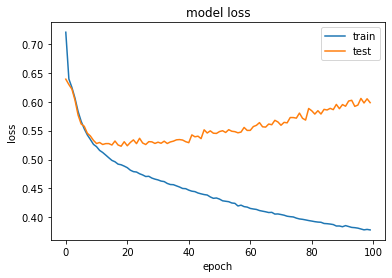

In [9]:
# Plotting loss & accuracy
plt.figure()
plt.plot(k.history['loss'])
plt.plot(k.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

После примерно 19 эпохи ошибка на тестовой выборке начинает расти.В этот момент сеть начинает переобучаться. Поэтому следует попробовать обучить модель на 19 эпохах.

In [10]:
# Initialising the ANN
rnn1 = Sequential()

# Adding the input layer and the first hidden layer
rnn1.add(Dense(20, activation = 'tanh', input_dim = 19))

# Adding the second hidden layer
rnn1.add(Dense(10, activation = 'tanh'))

# Adding the third hidden layer
rnn1.add(Dense(5, activation = 'tanh'))

# Adding the output layer
rnn1.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [11]:
# Fitting the ANN to the Training set
k1 = rnn1.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 18)

Epoch 1/18
672/672 [==============================] - 1s 1ms/step - loss: 0.7517 - accuracy: 0.0000e+00 - val_loss: 0.6514 - val_accuracy: 0.0000e+00
Epoch 2/18
672/672 [==============================] - 1s 1ms/step - loss: 0.6379 - accuracy: 0.0000e+00 - val_loss: 0.6274 - val_accuracy: 0.0000e+00
Epoch 3/18
672/672 [==============================] - 1s 1ms/step - loss: 0.6165 - accuracy: 0.0000e+00 - val_loss: 0.6093 - val_accuracy: 0.0000e+00
Epoch 4/18
672/672 [==============================] - 1s 1ms/step - loss: 0.5965 - accuracy: 0.0000e+00 - val_loss: 0.5963 - val_accuracy: 0.0000e+00
Epoch 5/18
672/672 [==============================] - 1s 1ms/step - loss: 0.5819 - accuracy: 0.0000e+00 - val_loss: 0.5659 - val_accuracy: 0.0000e+00
Epoch 6/18
672/672 [==============================] - 1s 1ms/step - loss: 0.5682 - accuracy: 0.0000e+00 - val_loss: 0.5582 - val_accuracy: 0.0000e+00
Epoch 7/18
672/672 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.0000e

Для данной НС так же оптимальным числом batch_size является 10.

In [12]:

# Predicting the Test set results
y_pred1 = rnn1.predict(X_test)

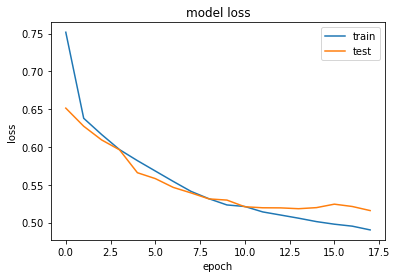

In [13]:
# Plotting loss & accuracy
plt.figure()
plt.plot(k1.history['loss'])
plt.plot(k1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [14]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [15]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(1.205, 1.55)

In [16]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn1.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat1, squared=False).round(3)

(1.384, 1.439)

Итак, получены значения MSE.  На обучающей мы имеем наименьшее число, среди всех полученных моделей. 

In [17]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test1 = sc_y.inverse_transform(y_test)
X_test1 = sc_X.inverse_transform(X_test)

Таким образом, были построены 2 НС, последняя из которых выдала один из минимальных значений MSE. Для оптимального результата требуются эксперименты, а именно подбор значений batch_size и исходя из графика ошибок на тестовой и обучающей - оптимальное число эпох.

# ВЫВОД
После того, как был выбран датасет - мы занялись подготовкой данных. Затем началась работа с построением моделей линейных и нелинейных регрессией, нейронных сетей.
В ходе этого выявлено, что наилучшим образом показал себя метод CatBoost и Нейронная сеть. Выводы по нелинейной регрессии были сделаны на соответсвующей странице. По поводу НС хотелось бы добавить, что были проведены эксперименты, как и с количеством слоев, размерностью batch_size и выявлен наилучший результат. И получилось добиться один из лучших результатов.
Таким образом целесообразно в дальнейшем использовать модель CatBoost и НС для прогнозирования результатов. Но следует заметить, что в модель лучще добавить предикторы для улучшения качества, ведь так же в ходе эксперимента выявлено, что с большим числом факторов улучшается качество. При данных условиях модель описана на среднем уровне и нуждается в доработке.